**Tutorial Python Machine Learning**

Contributor :


*   Alverio Yosephine Kurtinus (1606917960)
*   Damar Wardoyo (1606918080)
*   Nabila Febri Viola (1706039654)




Import files dari library google untuk upload file csv. Setelah itu membaca data file csv yang telah diupload menjadi dataframe.

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import impute, preprocessing, decomposition
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, confusion_matrix,classification_report
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Credit_card.csv']))

Saving Credit_card.csv to Credit_card (6).csv


Menampilkan 5 data teratas dan nama dari masing masing kolom yang ada

In [0]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Mengetahui ukuran dataframe

In [0]:
df.shape

(8950, 18)

Menggunakan fungsi .info() untuk melihat tipe data dari masing masing kolom. Karena tipe data sudah berbentuk float/int maka tidak perlu dilakukan parsing tipe data.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

Menggunakan fungsi .describe() untuk mengetahui statistik deskriptif dari dataset. Pada kolom CASH_ADVANCE_FREQUENCY terlihat bahwa terdapat data dengan nilai lebih dari 1. Kami akan melakukan pemeriksaan lebih lanjut pada data tersebut.

In [0]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Selanjutnya kami mengecek apakah ada data bernilai null dalam dataset, ternyata terdapat 313 data null pada kolom MINIMUM_PAYMENTS dan 1 data null pada kolom CREDIT_LIMIT.

In [0]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Kami ingin mengetahui berapa persen nilai data null yang ada dalam dataset. 

In [0]:
df.apply(lambda x: sum(x.isnull()/len(df)))

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Selanjutnya, kami melakukan penghapusan data (row) yang terdapat feature yang kosong (NaN)

In [0]:
df.dropna(inplace=True)

In [0]:
df.shape

(8636, 18)

Selanjutnya kami ingin melihat seperti apa korelasi antar masing masing data menggunakan metode pearson dan spearman.

In [1]:
corr = df.corr(method='pearson')
corr.style.format("{:.2}").background_gradient(cmap =plt.get_cmap('GnBu'),
axis=0)

NameError: name 'df' is not defined

In [2]:
corr = df.corr(method='spearman')
corr.style.format("{:.2}").background_gradient(cmap =plt.get_cmap('coolwarm'),
axis=1)

NameError: name 'df' is not defined

Kami menggunakan boxplot untuk visualisasi data yang berkaitan dengan 'frekuensi'. Ternyata terdapat banyak outlier dalam dataset.

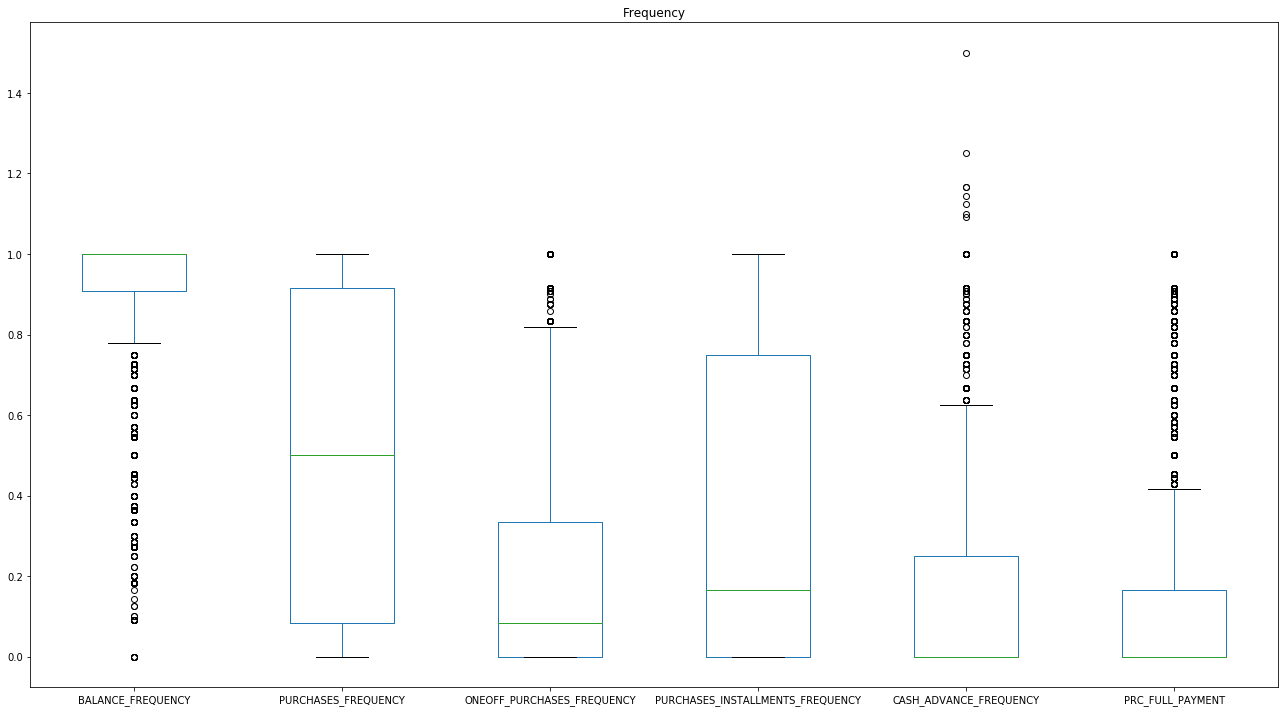

In [0]:
df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

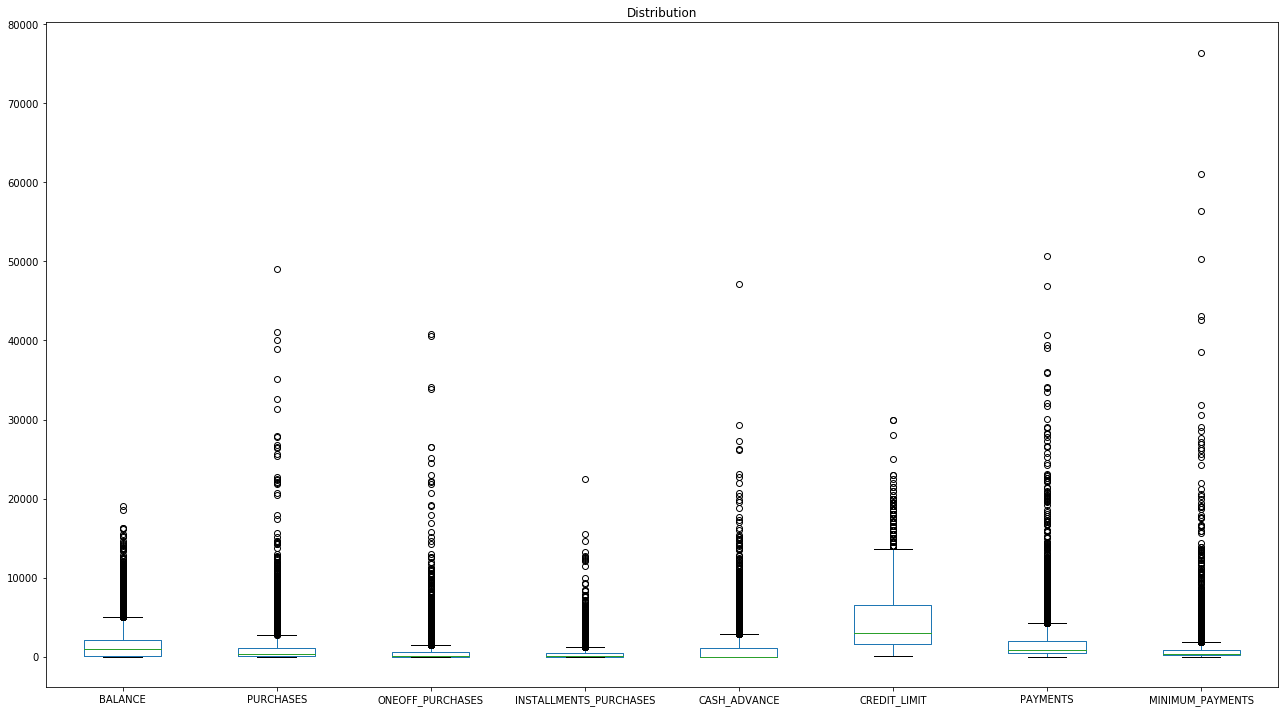

In [0]:
df[['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS'
]].plot.box(figsize=(18,10),title='Distribution',legend=True);
plt.tight_layout()

Untuk menjaga konsistensi frekuensi data yang berkisar dari 0 sampai 1, yang dimana 0 berarti *not frequently purchased* dan 1 berarti *frequently purchased*. Kami menemukan bahwa pada kolom 'CASH_ADVANCE_FREQUENCY' memiliki 8 data yang memiliki nilai lebih dari 1.

In [0]:
df.loc[(df['CASH_ADVANCE_FREQUENCY']>1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


Lalu selanjutnya kita drop data dengan frekuensi lebih dari 1

In [0]:
df = df[(df[['CASH_ADVANCE_FREQUENCY']] <= 1).all(axis=1)]

Data berhasil di drop.

In [0]:
df.shape

(8628, 18)

Kami memutuskan untuk menghapus kolom CUST_ID, karena menurut kami kolom ini tidak relevan untuk analisis yang akan kami lakukan



In [0]:
#df.reset_index(inplace=True)
df.drop('CUST_ID',inplace=True,axis=1)
#df.head()

In [0]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Salah satu cara untuk mengisi data null dengan median

In [0]:
#median_imputer = impute.SimpleImputer(missing_values=np.NaN,
#strategy='median')
#transformed_median = median_imputer.fit_transform(df)

#create new dataframe
#median_dataframe = pd.DataFrame(transformed_median,
#columns=list(df.columns))
#median_dataframe
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Memastikan tidak ada data null di dalam dataset

In [0]:
#median_dataframe.isnull().sum()

In [0]:
# median_dataframe[['BALANCE',
#  'PURCHASES',
#  'ONEOFF_PURCHASES',
#  'INSTALLMENTS_PURCHASES',
#  'CASH_ADVANCE',
#  'CREDIT_LIMIT',
#  'PAYMENTS',
#  'MINIMUM_PAYMENTS'
# ]].plot.box(figsize=(18,10),title='Distribution',legend=True);
# plt.tight_layout()

In [0]:
#data = df[df.columns]
# data_impute

In [0]:
# mode_imputer = impute.SimpleImputer(missing_values=np.NaN,
# strategy='median')
#data_impute = mode_imputer.fit_transform(data)

In [0]:
#minmax_scale = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()

#data_clean = minmax_scale.fit_transform(data_impute)
data = scaler.fit_transform(df)



In [0]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12
10,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12


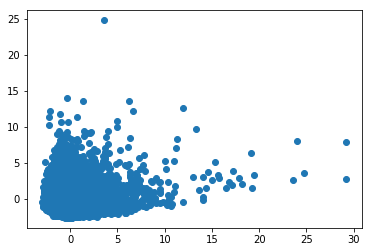

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_clean)
plt.scatter(principalComponents[:,0], principalComponents[:,1])

Memvalidasi kira kira jumlah cluster yang paling optimal untuk data yang miliki  berapa jumlahnya. Ternyata jumlah kluster yang paling optimal untuk data yang kami miliki adalah dua kluster.

[0.45668074901922795, 0.44088801486075296, 0.39748913396982655, 0.391016830129847, 0.37724025811453465, 0.36868939015658114, 0.3862581858274718, 0.3662321510450618, 0.35140569218803397]


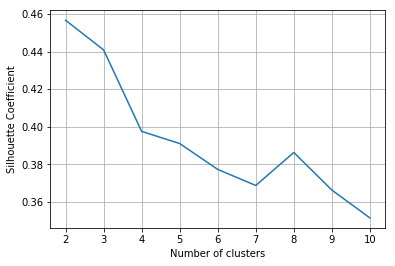

In [0]:
# calculate SC for K=2 through K=10
k_range = range(2, 11)
scores = []
for k in k_range:
  km = KMeans(n_clusters=k, random_state=1)
  km.fit(principalComponents)
  scores.append(silhouette_score(principalComponents, km.labels_))
  
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
print(scores)

Setelah itu kami memvisualisasikan cluster data.

In [0]:
#initialize k-means clustering
k=2
kmeans = KMeans(n_clusters=k)
#training k-means clustering
kmeans.fit(principalComponents)
#predict data
clusters = kmeans.predict(principalComponents)

Text(0, 0.5, 'Principal Component 2')

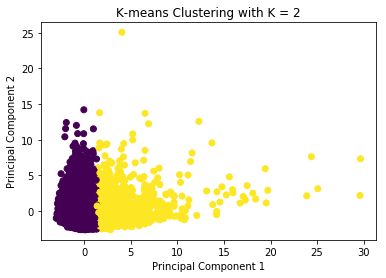

In [0]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=clusters)
plt.title("K-means Clustering with K = "+str(k))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Kami mencoba menggunakan elbow method untuk mencari berapa jumlah cluster yang optimum untuk dataset kami. Terlihat dari visualisasi data, menggunakan lebih dari 8 cluster data, memberikan benefit yang kurang signifikan dalam pembentukan model. Oleh karena itu kami akan menggunakan 8 cluster untuk training model kami.

In [0]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_clean)
    inertia.append(np.sqrt(kmeans.inertia_))

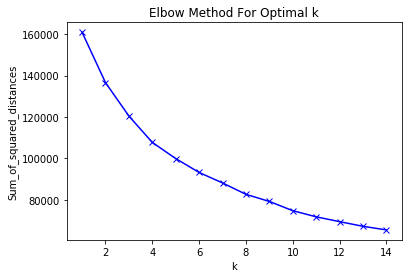

In [0]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
#initialize k-means clustering
k=2
kmeans = KMeans(n_clusters=k)
#training k-means clustering
kmeans.fit(principalComponents)
#predict data
clusters = kmeans.predict(principalComponents)

Text(0, 0.5, 'Principal Component 2')

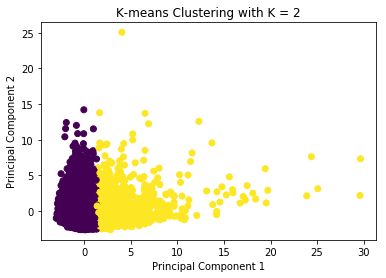

In [0]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=clusters)
plt.title("K-means Clustering with K = "+str(k))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')